In [9]:
from transforms import PreprocessTransform
from torch_geometric.data import Data
import torch
from objects import MultiScaleData
num_nodes = 6
edge_index = torch.stack([
    torch.arange(num_nodes),
    torch.arange(1,num_nodes + 1) % num_nodes
])
edge_index = torch.cat([edge_index,edge_index.flip(0)],-1)
edge_index = torch.cat([edge_index,edge_index + num_nodes],-1)
num_nodes *= 2
edge_attr = torch.zeros(edge_index.size(1))
data : MultiScaleData= PreprocessTransform()(Data(torch.zeros(num_nodes),edge_index=edge_index,edge_attr=edge_attr,num_nodes=num_nodes))

In [13]:
print(data.edge_index_edge.size())
from torch_geometric.utils import degree
print(degree(data.edge_index_edge[0]),degree(data.edge_index_edge[1]))
print(data.num_cycles)
print(data.edge_index_edge_cycle)
print(data.cycle_attr)
print(data.edge_attr_cycle_edge)
print(data.cycle2edge_msg_ind)

torch.Size([2, 288])
tensor([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12.]) tensor([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])
2
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1]])
tensor([6, 6])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [20]:
from torch_geometric.datasets import ZINC
from objects import MultiScaleData
ds = ZINC('data/ZINC/',True,'val')
data : MultiScaleData = ds[0]

/home/andrew/.local/lib/python3.10/site-packages/torch_geometric/data/dataset.py:209: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'data/ZINC/subset/processed' first
  warnings.warn(


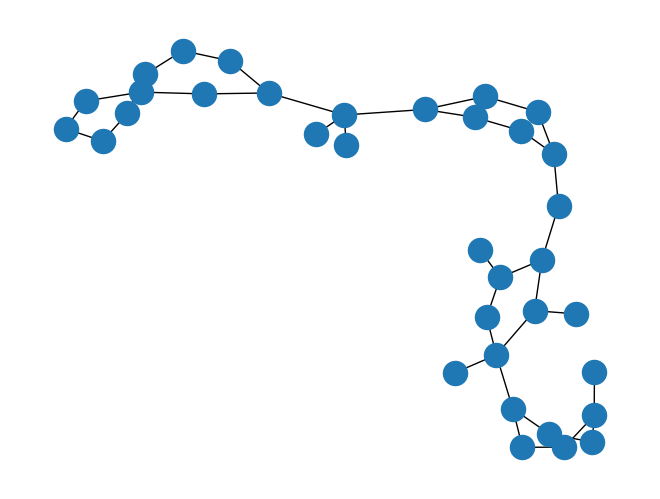

In [27]:
from torch_geometric.utils import to_networkx
import networkx as nx
graph : nx.graph = to_networkx(data,to_undirected=True)
nx.draw(graph)
# nx.draw_networkx_labels(graph,labels=[i for i in range(data.num_nodes)])